In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import functions as f 
from fenics import File

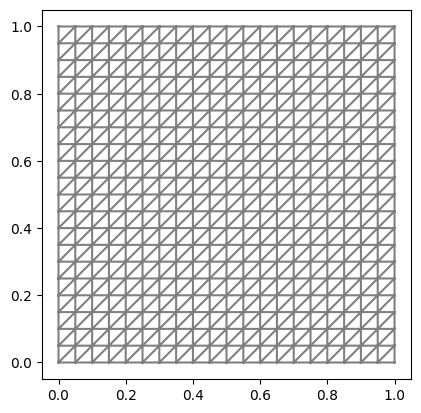

In [2]:
mesh = UnitSquareMesh(20,20)
plot(mesh)

In [3]:
# V = FunctionSpace(mesh,"P",2)
# vs = Expression('V_plus*tanh(x[1]/csi_plus)*tanh((1-x[1])/csi_plus)*(0.5+0.5*tanh((x[0]-c_H)*pow(epsilon,-1))) \
#                 - V_minus*tanh(x[1]/csi_minus)*tanh(pow(1-x[1],2)/csi_minus)*(0.5+0.5*tanh((c_H-x[0])*pow(epsilon,-1)))',
#                 V_plus=V_plus,V_minus=V_minus,csi_minus=csi_minus,csi_plus=csi_plus,c_H=c_H,epsilon=epsilon,degree=2)
# vs = interpolate(vs,V)
# sol = plot(vs)
# plt.colorbar(sol)
# plt.xlabel('c')
# plt.ylabel('s')
# plt.title('v_s')
# plt.show()

In [4]:
# P = Expression('p_csc*pow(x[0],4)/(pow(K_csc,4)+pow(x[0],4))*exp(-pow((x[1]-s_csc)/g_csc,2)) \
#                + p_dc*pow(x[0],4)/(pow(K_dc,4)+pow(x[0],4))*exp(-pow((x[1]-s_dc)/g_dc,2))',
#                p_csc=p_csc,p_dc=p_dc,K_csc=K_csc,K_dc=K_dc,g_csc=g_csc,g_dc=g_dc,s_csc=s_csc,s_dc=s_dc,degree=2)
# K = Expression('d_tdc * exp(-((1-x[1])/g_tdc)) + d_n * (0.5+0.5*tanh((c_N-x[0])/epsilon_k))',
#                d_tdc=d_tdc,d_n=d_n,g_tdc=g_tdc,epsilon_k=epsilon_k,c_N=c_N,degree=2)
# F = Expression("P-K", degree=2, P=P, K=K)
# F = interpolate(F,V)
# sol = plot(F)
# plt.colorbar(sol)
# plt.xlabel('c')
# plt.ylabel('s')
# plt.title('P-K')
# plt.axvline(c_N,color='r')
# plt.show()


In [7]:
s0 = 0.5
sigma = sqrt(0.02)
Dxc = 4.32*1e3
gamma = 4*Dxc
K_m = 0.0125
Dxn = 2.4*1e-3
Dsn = 1.2*1e-4
p_csc = 0.12
p_dc = 0.48
K_csc = 0.05
K_dc = 0.3 
g_csc = 0.1
g_dc = 0.2
g_tdc = 0.1
s_csc = 0
s_dc = 0.55
epsilon = 0.05
epsilon_k = 0.01
V_plus = 1.92*1e-2
V_minus = 0.48*1e-2
csi_plus = 0.1
csi_minus = 0.1
c_H = 0.3
c_N = 0.0125
c_R = 0.1
d_tdc = 0.024
d_n = 2.4
OER = 3
alpha_min = 0.007
delta_alpha = 0.143
beta_min = 0.002
delta_beta = 0.018
k=1e3

In [31]:
V = FunctionSpace(mesh,"P",2)
P = Expression('(p_csc*pow(x[0],4)/(pow(K_csc,4)+pow(x[0],4))*exp(-pow((x[1]-s_csc)/g_csc,2)) \
               + p_dc*pow(x[0],4)/(pow(K_dc,4)+pow(x[0],4))*exp(-pow((x[1]-s_dc)/g_dc,2)))*(1-phi)',
               p_csc=p_csc,p_dc=p_dc,K_csc=K_csc,K_dc=K_dc,g_csc=g_csc,g_dc=g_dc,s_csc=s_csc,s_dc=s_dc,phi=1,degree=2)
a1 = Expression('(x[0] > c_R) ? 1 : 1/OER',c_R=c_R,OER=OER,degree=2)
a2 = Expression('alpha_min + delta_alpha*tanh(k*x[1])',alpha_min=alpha_min,delta_alpha=delta_alpha,k=5,degree=2)
a3 = Expression('1+P/Pmax', P=P,Pmax=p_dc,degree=2)

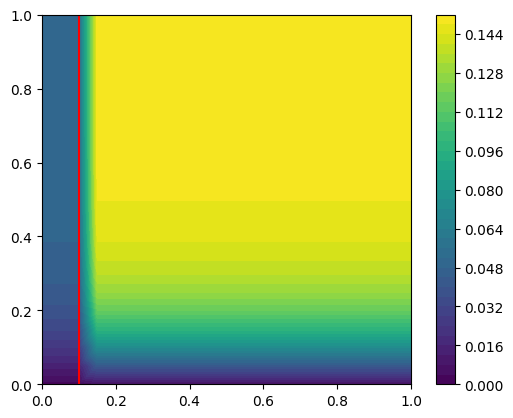

In [32]:
a = Expression('a1*a2*a3',a1=a1,a2=a2,a3=a3,degree=4)
a = interpolate(a,V)
sol = plot(a)
plt.colorbar(sol)
plt.axvline(c_R,color='r')

In [8]:
# test RT
m0 = 1e-2
dt = 0.1
T = 251
save_interval = 500
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
nfile = XDMFFile('solutions/nB.xdmf')
cfile = XDMFFile('solutions/cB.xdmf')
V = FunctionSpace(mesh,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[1]-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=2)
n0 = interpolate(n0,V)
c_k = interpolate(Constant(1.0), V)

n_vect,c_vect,mass = f.solver(mesh,V,n0,c_k,dt,T,save_interval,times,doses,nfile,cfile)

time=0: 
Solving linear variational problem.
iter=1: norm=0.014183
Solving linear variational problem.
iter=2: norm=0.00022344
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=0.000486473
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=0.000510784
Solving linear variational problem.time=3: 

Solving linear variational problem.
iter=1: norm=0.000532161
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=0.000554353
Solving linear variational problem.
time=5: 
Solving linear variational problem.
iter=1: norm=0.000577451
Solving linear variational problem.time=6: 

Solving linear variational problem.
iter=1: norm=0.00060149
Solving linear variational problem.
time=7: 
Solving linear variational problem.
iter=1: norm=0.000626504
Solving linear variational problem.
time=8: 
Solving linear variational problem.
iter=1: norm=0.00065253
Solving linear variational 

KeyboardInterrupt: 

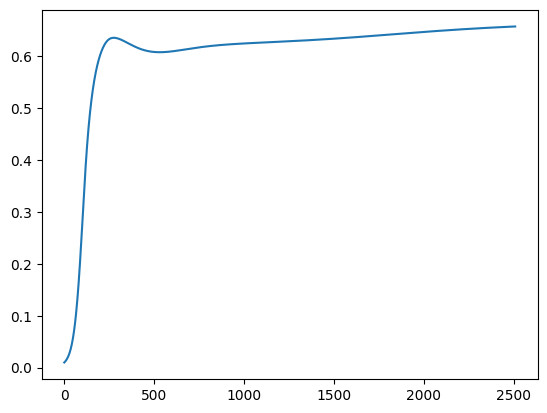

In [8]:
plt.plot(mass)
#plt.axhline(m0,color='r')

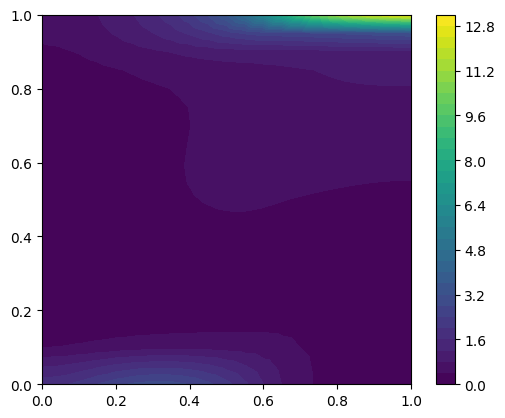

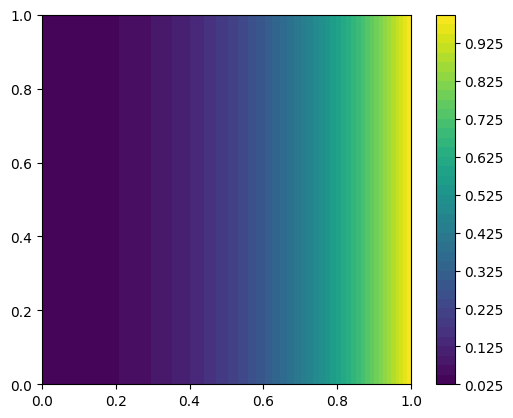

In [3]:
V = FunctionSpace(mesh,"P",2)
n0 = Function(V)
nfile = XDMFFile('solutions/nB.xdmf')
nfile.read_checkpoint(n0,"n",5)
sol = plot(n0)
plt.colorbar(sol)
plt.show()

c0 = Function(V)
cfile = XDMFFile('solutions/cB.xdmf')
cfile.read_checkpoint(c0,"c",5)
sol = plot(c0)
plt.colorbar(sol)
plt.show()

In [4]:
dt = 0.1
T = 150
save_interval = 10
times = [0,7,14,21,28]
doses = 10*np.ones_like(times)
nfile = XDMFFile('solutions/nBrt.xdmf')
cfile = XDMFFile('solutions/cBrt.xdmf')
V = FunctionSpace(mesh,"P",2)

n_vect,c_vect,mass = f.solver(mesh,V,n0,c0,dt,T,save_interval,times,doses,nfile,cfile)

time=0: 
Solving linear variational problem.
iter=1: norm=9.05238e-06
dose
Solving linear variational problem.
time=0.1: 
Solving linear variational problem.
iter=1: norm=0.0655328
Solving linear variational problem.
iter=2: norm=0.0354976
Solving linear variational problem.
iter=3: norm=0.0271188
Solving linear variational problem.
iter=4: norm=0.0223719
Solving linear variational problem.
iter=5: norm=0.0182161
Solving linear variational problem.
iter=6: norm=0.0144297
Solving linear variational problem.
iter=7: norm=0.0111537
Solving linear variational problem.
iter=8: norm=0.00845872
Solving linear variational problem.
iter=9: norm=0.00632432
Solving linear variational problem.
iter=10: norm=0.00467936
Solving linear variational problem.
iter=11: norm=0.00343598
Solving linear variational problem.
iter=12: norm=0.00250907
Solving linear variational problem.
iter=13: norm=0.00182489
Solving linear variational problem.
iter=14: norm=0.00132344
Solving linear variational problem.
iter

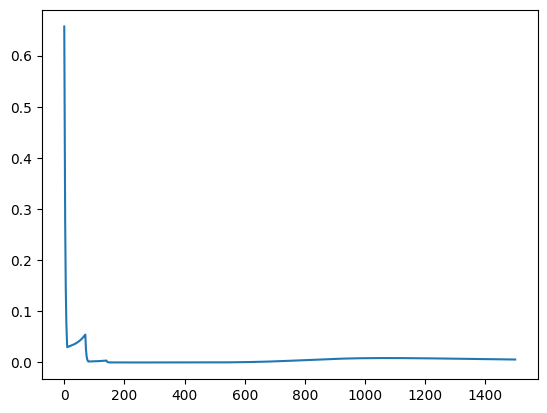

In [5]:
plt.plot(mass)

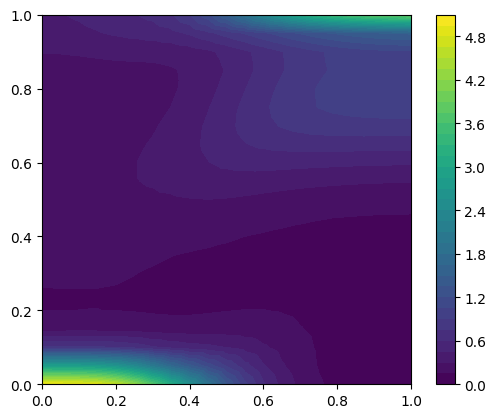

In [37]:
n = Function(V)
nfile = XDMFFile('solutions/nBrt.xdmf')
nfile.read_checkpoint(n,"n",29)
sol = plot(n)
plt.colorbar(sol)
plt.show()

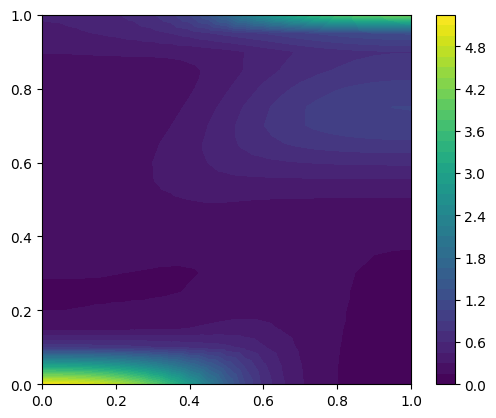

In [25]:
V = FunctionSpace(mesh,"P",2)
n = Function(V)
nfile = XDMFFile('solutions/nBrt.xdmf')
nfile.read_checkpoint(n,"n",16)
sol = plot(n)
plt.colorbar(sol)
plt.show()

In [6]:
# test case 1
m0 = 1e-3
dt = 0.1
T = 420
save_interval = 500
nfile = XDMFFile('solutions/n1e-3.xdmf')
cfile = XDMFFile('solutions/c1e-3.xdmf')
V = FunctionSpace(mesh,"P",2)

n_vect,c_vect,mass = f.solver(mesh,V,m0,dt,T,save_interval,nfile,cfile)

time=0: 
Solving linear variational problem.
iter=1: norm=0.00143869
Solving linear variational problem.
iter=2: norm=2.27357e-06
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=4.89442e-05
Solving linear variational problem.time=2: 

Solving linear variational problem.
iter=1: norm=5.10799e-05
Solving linear variational problem.time=3: 

Solving linear variational problem.
iter=1: norm=5.32319e-05
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=5.54739e-05
Solving linear variational problem.
time=5: 
Solving linear variational problem.
iter=1: norm=5.78094e-05
Solving linear variational problem.
time=6: 
Solving linear variational problem.
iter=1: norm=6.02421e-05
Solving linear variational problem.
time=7: 
Solving linear variational problem.
iter=1: norm=6.27757e-05
Solving linear variational problem.
time=8: 
Solving linear variational problem.
iter=1: norm=6.5414e-05
Solving linear variatio

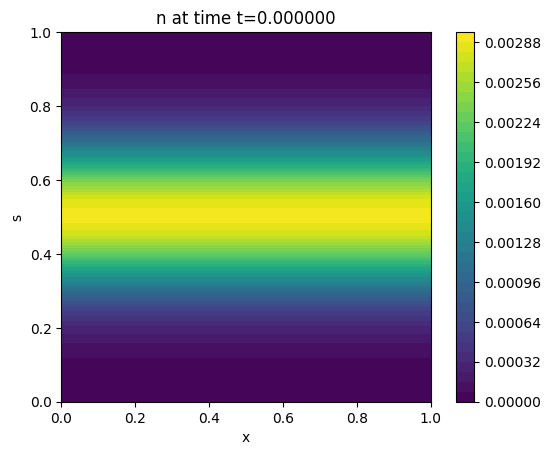

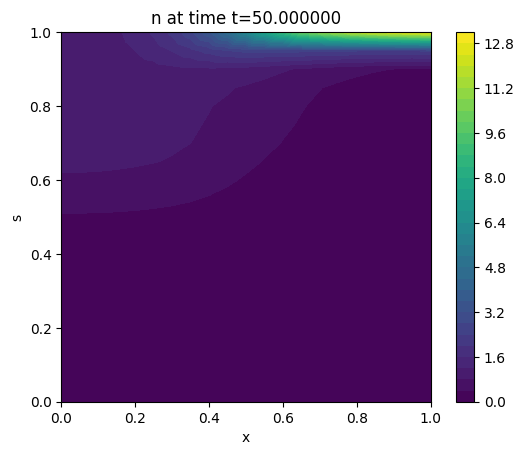

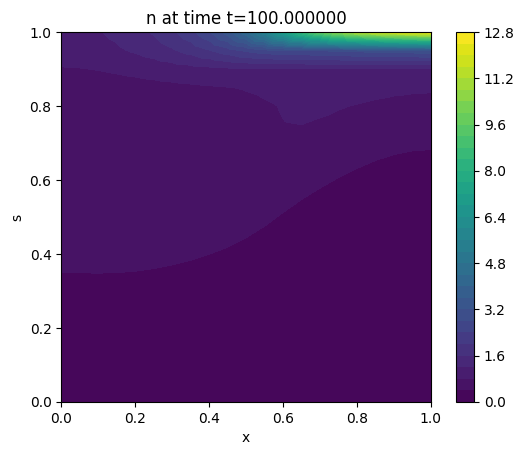

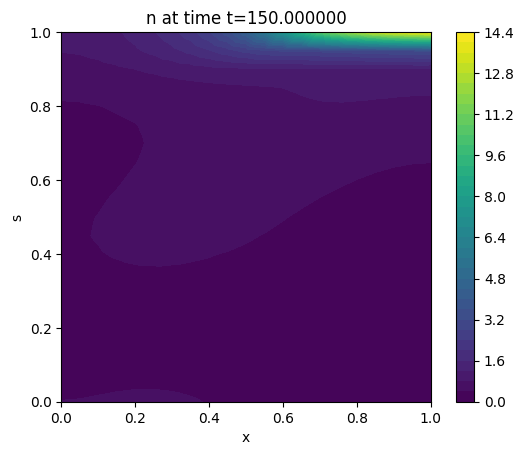

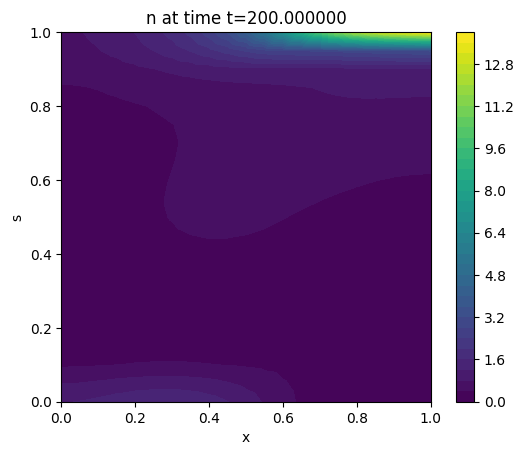

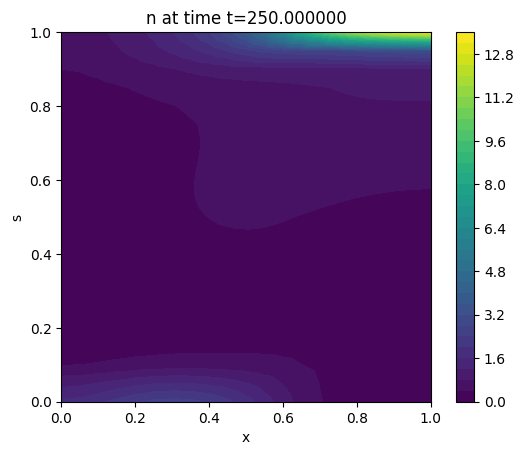

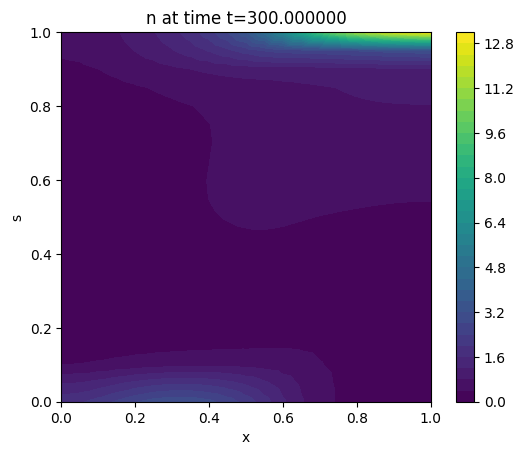

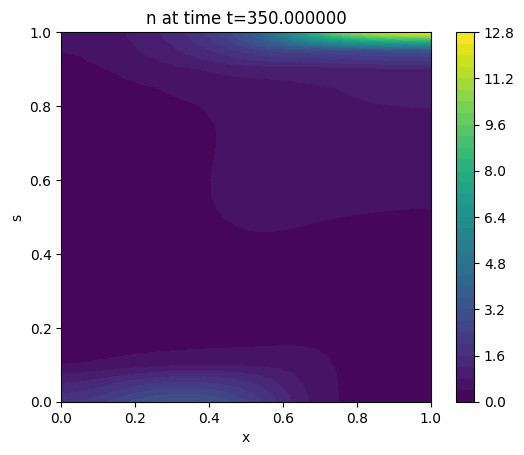

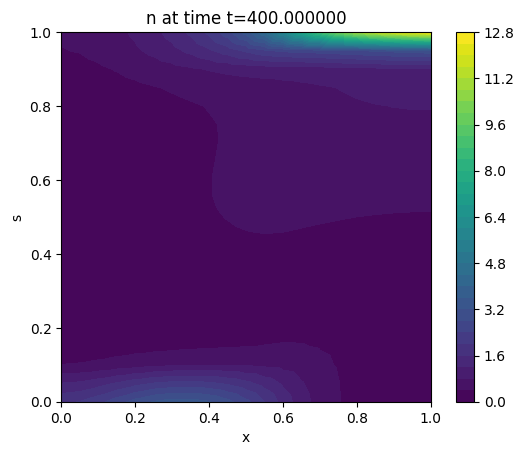

In [53]:
n = Function(V)
nfile = XDMFFile('solutions/n1e-3.xdmf')
for i in range(int(T/dt)//save_interval + 1):
    nfile.read_checkpoint(n,"n",i)
    sol = plot(n)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

In [32]:
# test case 2
m02 = 1e-4
dt = 0.1
T = 420
save_interval = 500
nfile2 = XDMFFile('solutions/n1e-4.xdmf')
cfile2 = XDMFFile('solutions/c1e-4.xdmf')

n_vect2,c_vect2,mass2 = f.solver(mesh,V,m02,dt,T,save_interval,nfile2,cfile2)

time=0: 
Solving linear variational problem.
iter=1: norm=0.000144076
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=4.92327e-06
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=5.10794e-06
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=5.32332e-06
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=5.54775e-06
Solving linear variational problem.
time=5: 
Solving linear variational problem.
iter=1: norm=5.78156e-06
Solving linear variational problem.
time=6: 
Solving linear variational problem.
iter=1: norm=6.02512e-06
Solving linear variational problem.
time=7: 
Solving linear variational problem.
iter=1: norm=6.27879e-06
Solving linear variational problem.
time=8: 
Solving linear variational problem.
iter=1: norm=6.54298e-06
Solving linear variational problem.
time=9: 
Solving linear variational problem.
i

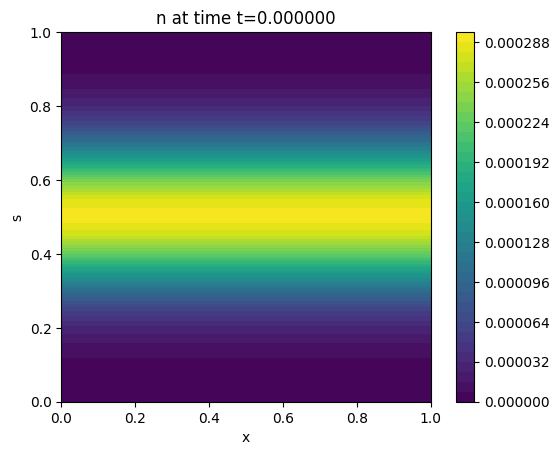

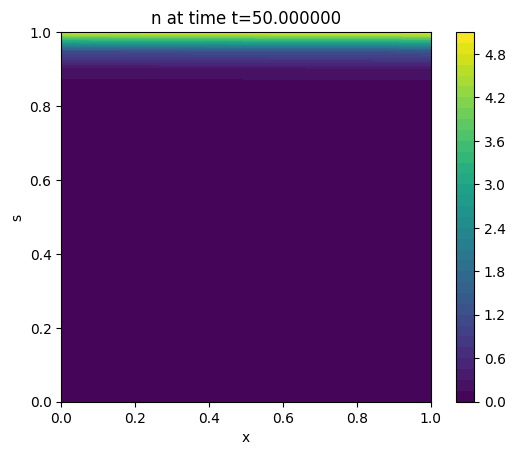

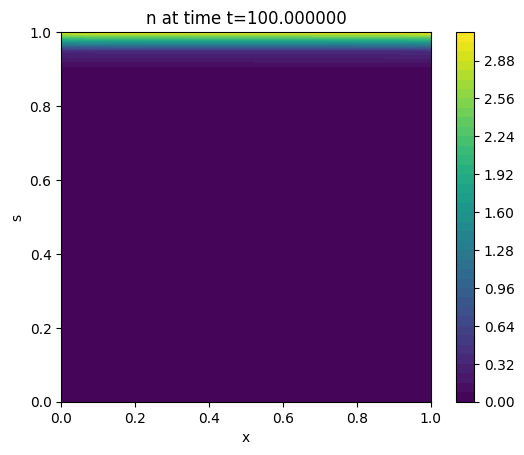

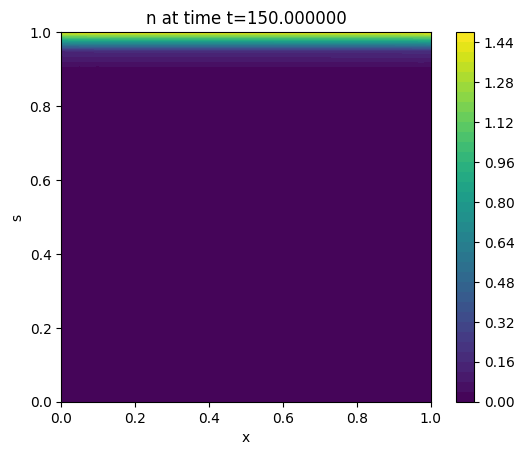

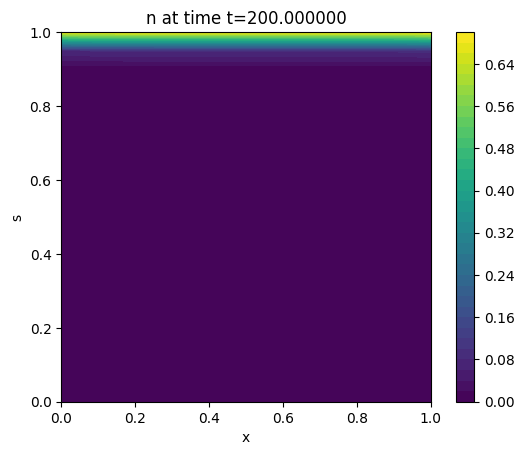

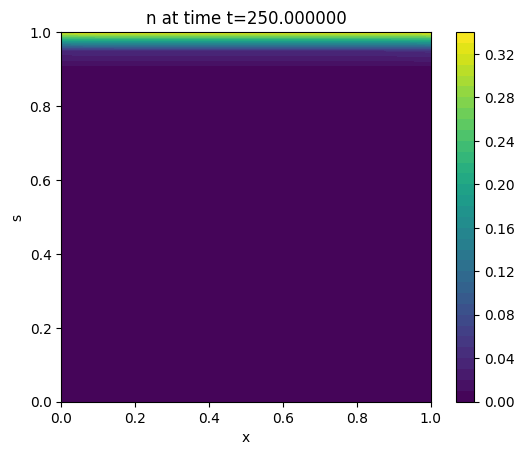

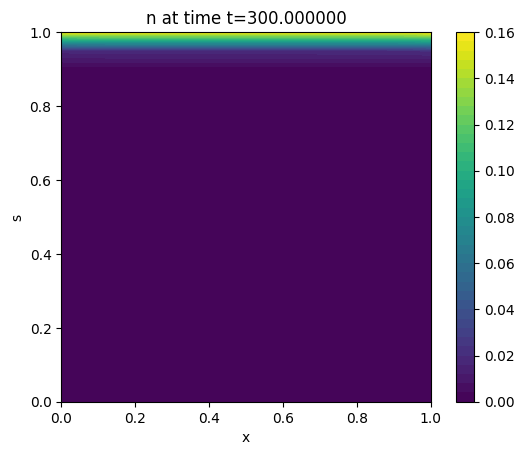

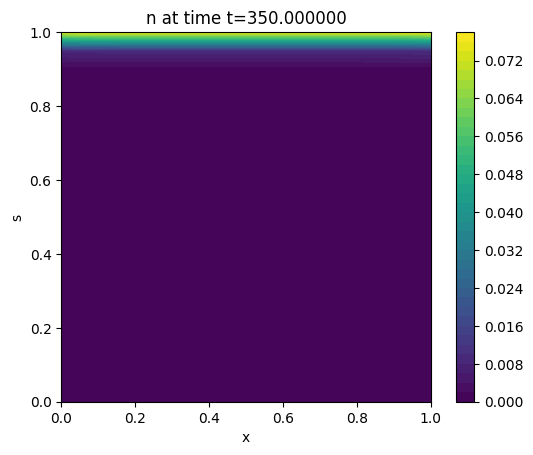

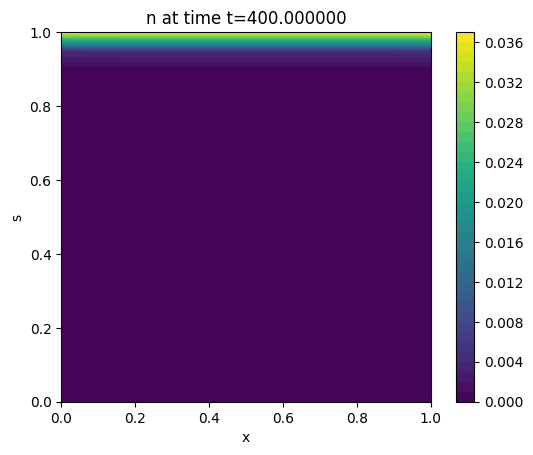

In [52]:
n = Function(V)
for i in range(int(T/dt)//save_interval + 1):
    nfile2.read_checkpoint(n,"n",i)
    sol = plot(n)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

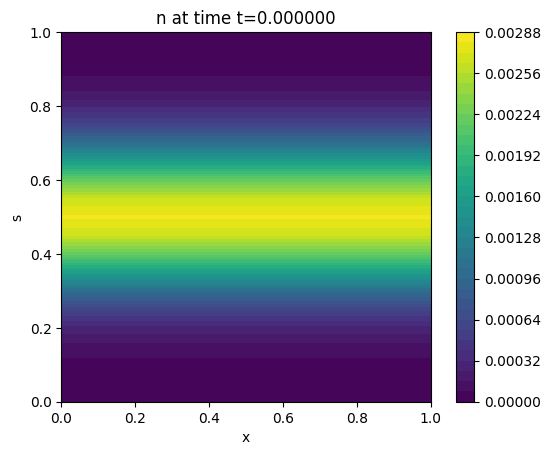

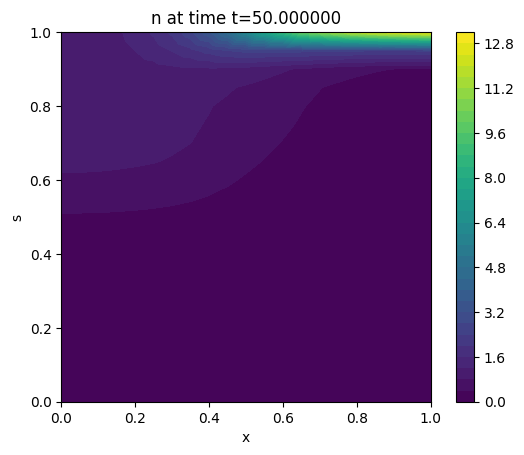

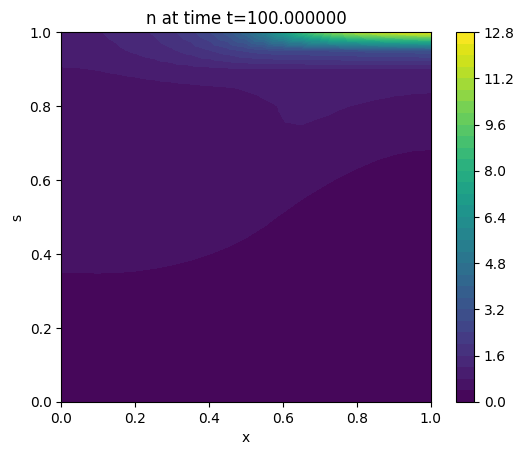

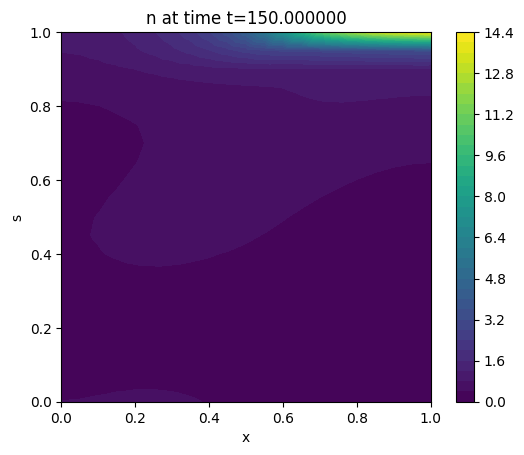

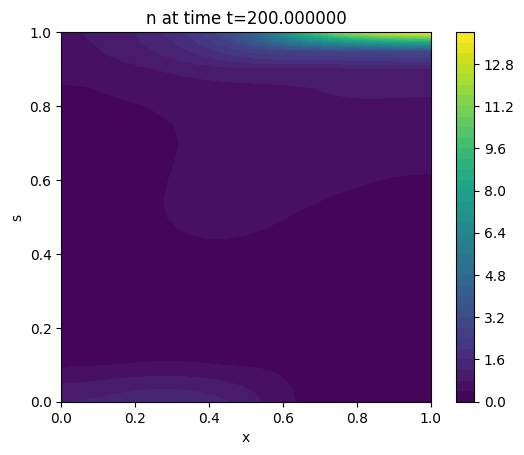

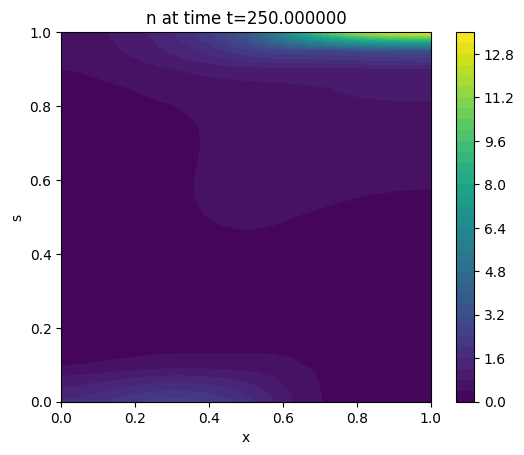

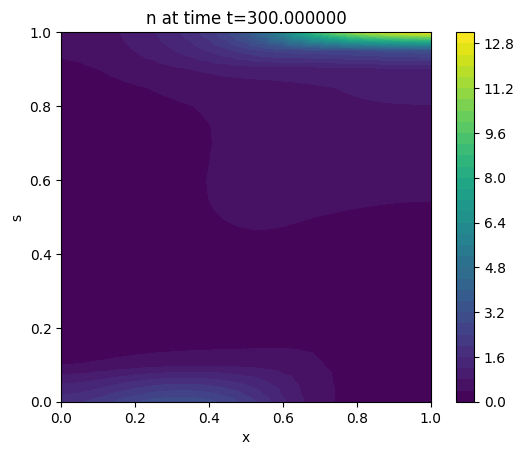

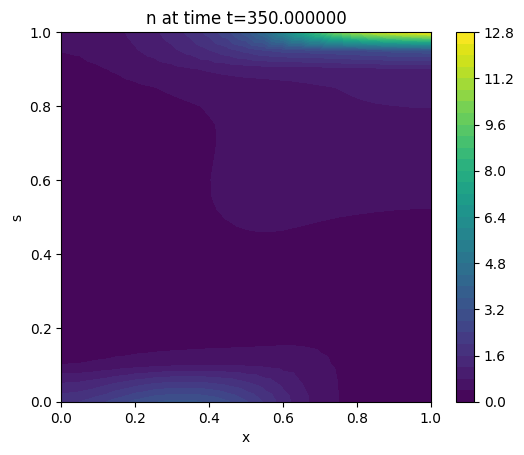

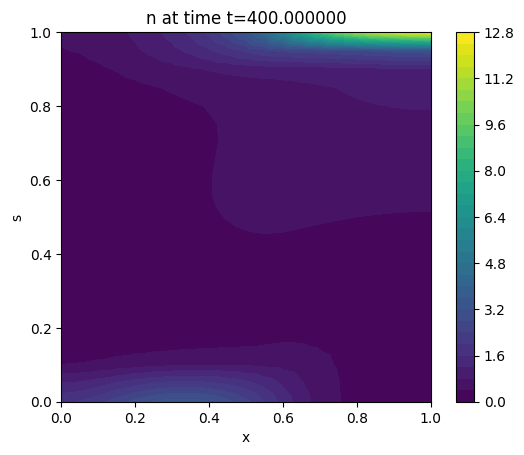

In [16]:
V = FunctionSpace(mesh,"P",2)
N = Function(V)
for i,n in enumerate(n_vect):
    N.vector().set_local(n)
    sol = plot(N)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

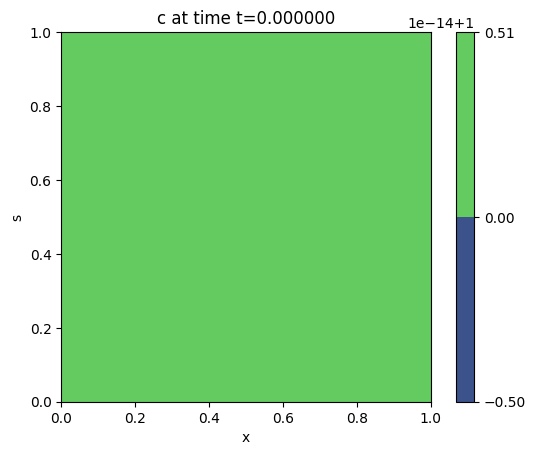

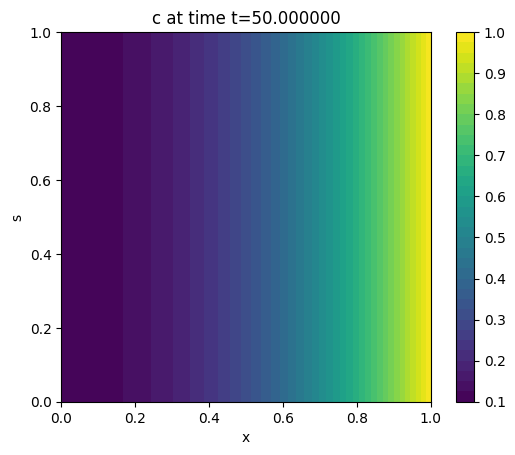

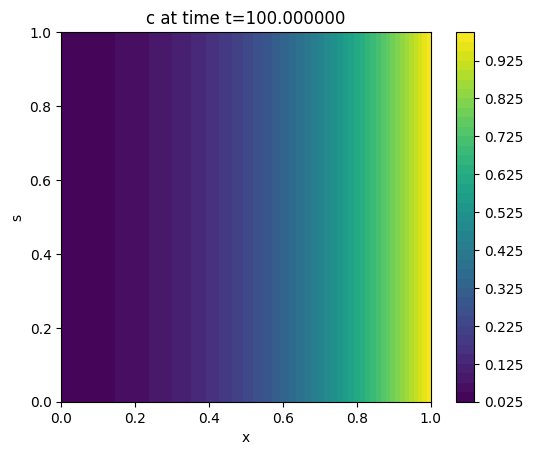

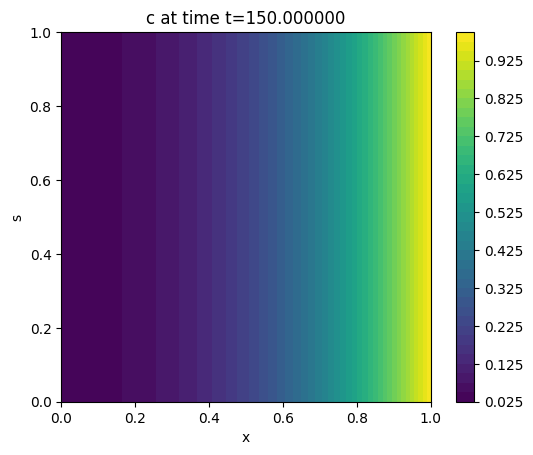

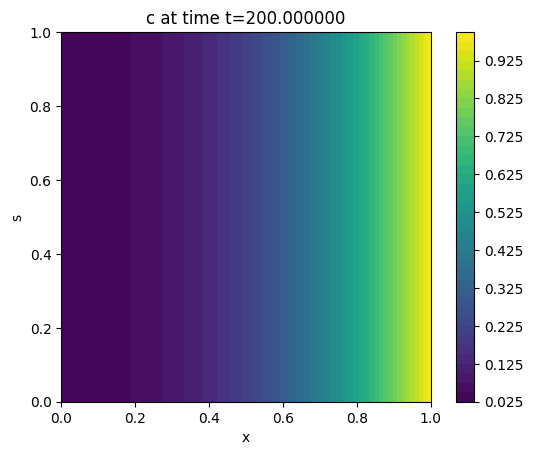

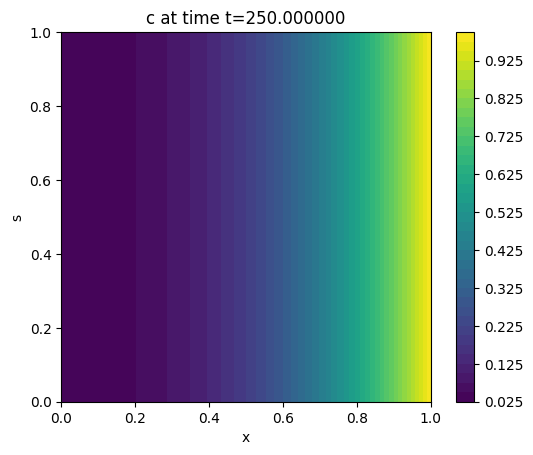

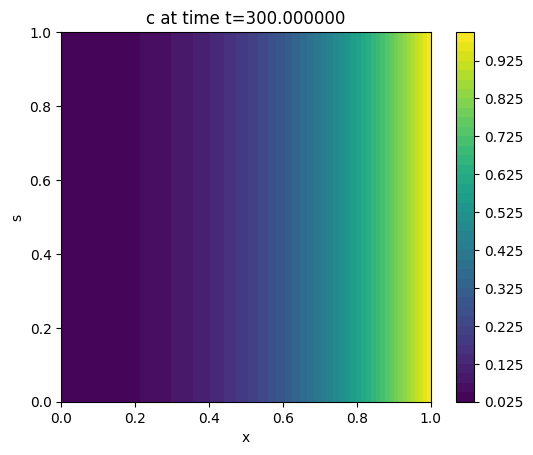

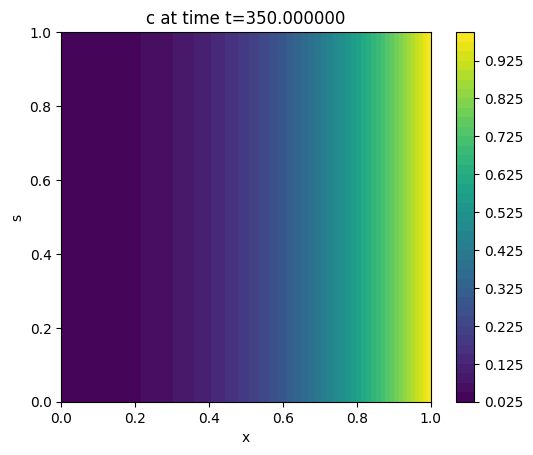

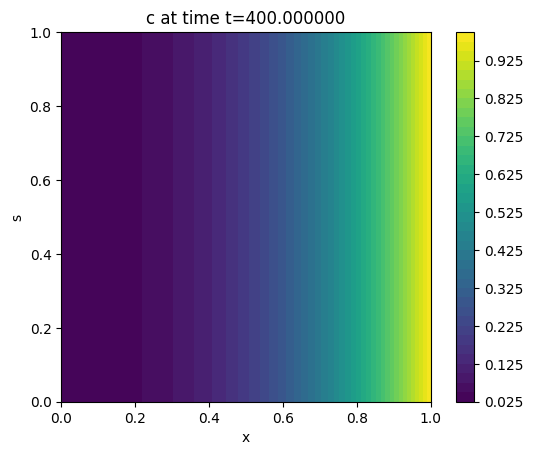

In [17]:
C = Function(V)
for i,c in enumerate(c_vect):
    C.vector().set_local(c)
    sol = plot(C)
    plt.colorbar(sol)
    plt.title('c at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

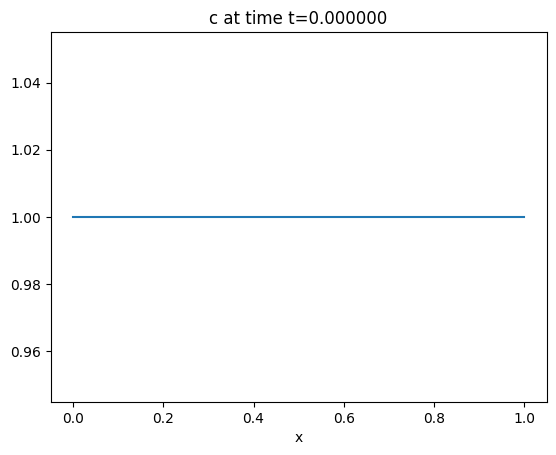

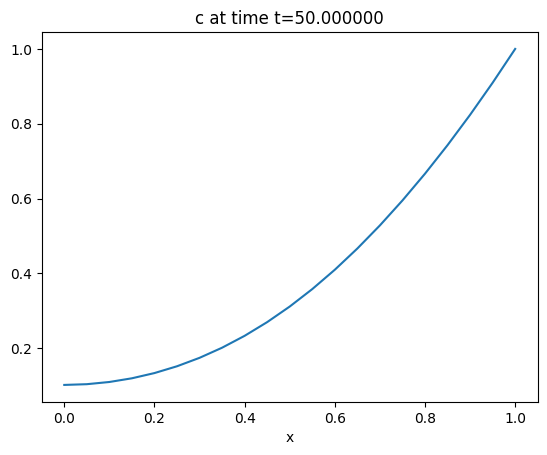

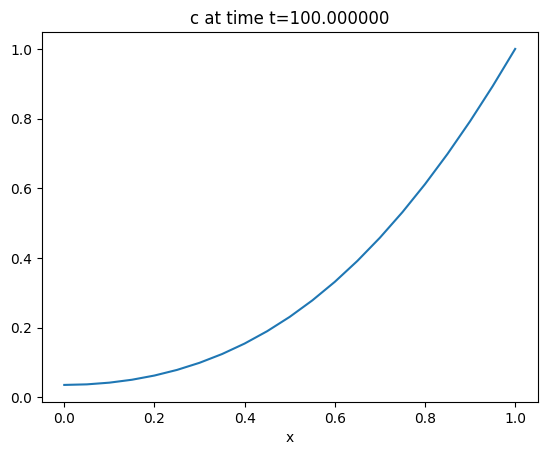

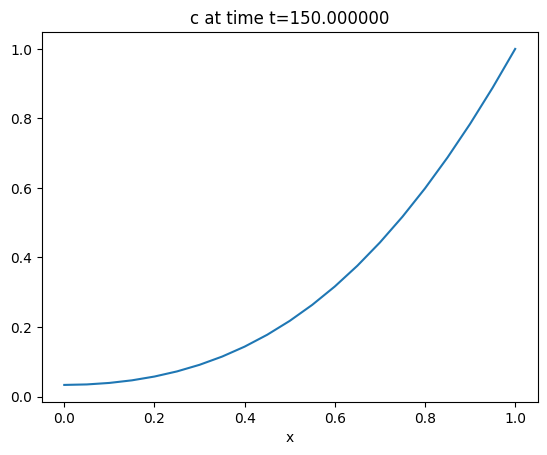

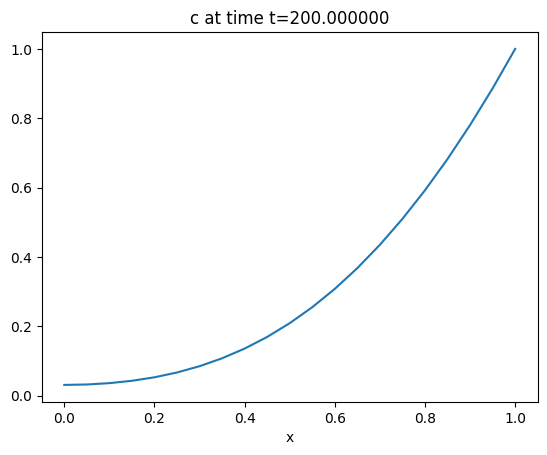

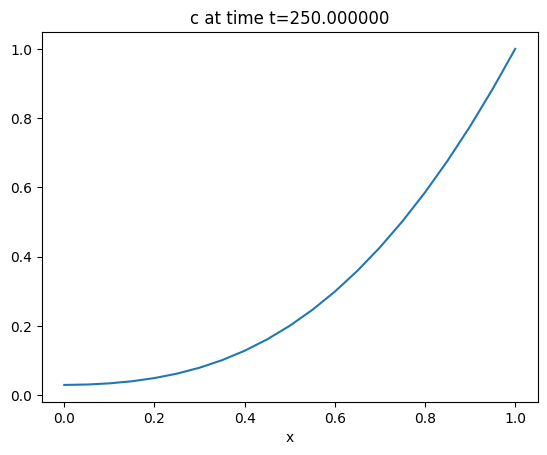

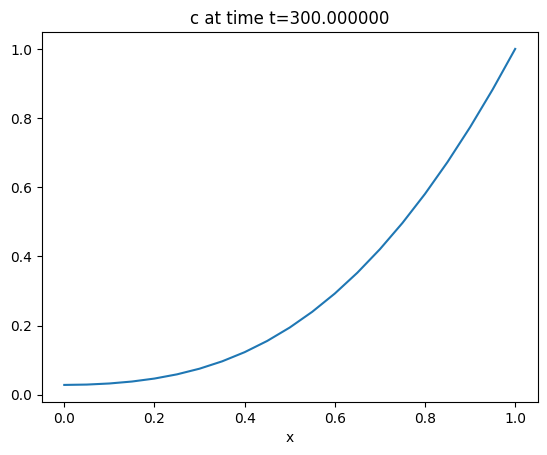

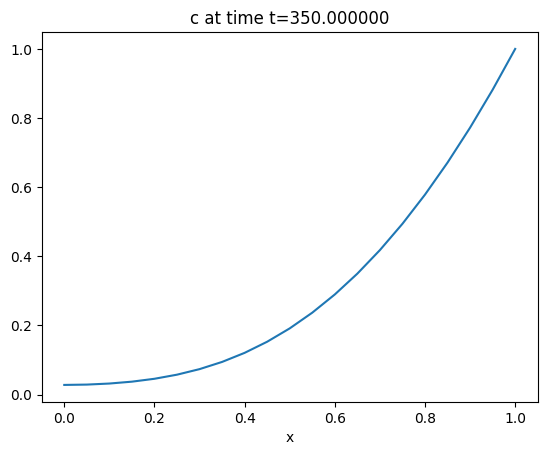

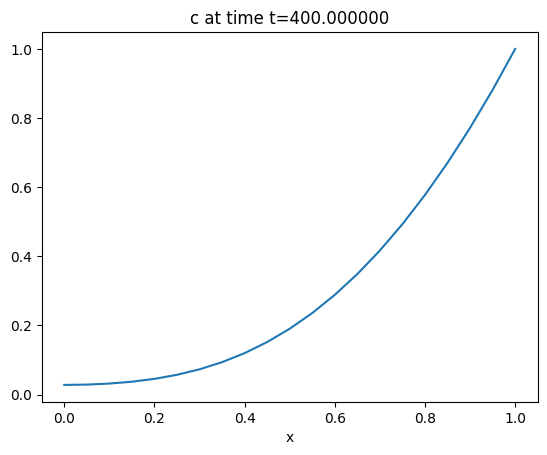

In [18]:
mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
for i,c in enumerate(c_vect):
    C.vector().set_local(c)
    c1D = interpolate(C,V1D)
    sol = plot(c1D)
    plt.title('c at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.show()


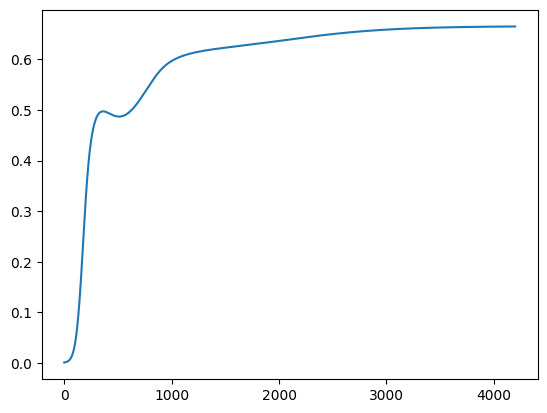

In [19]:
plt.plot(mass)

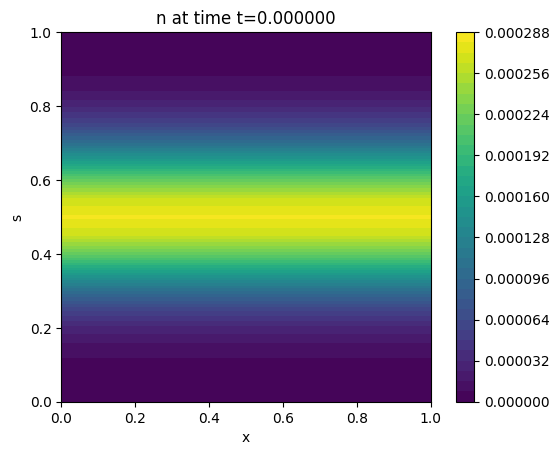

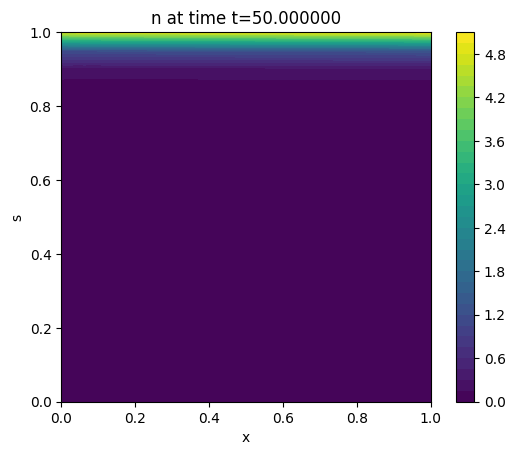

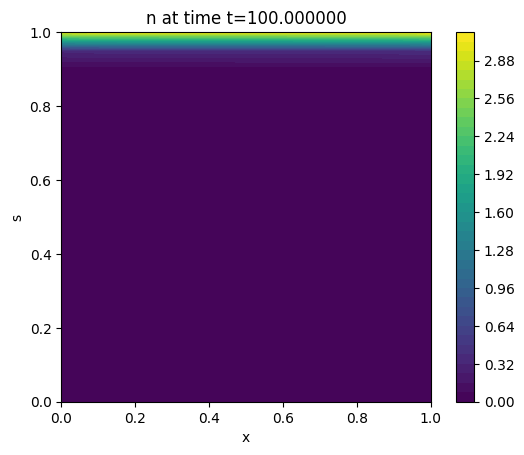

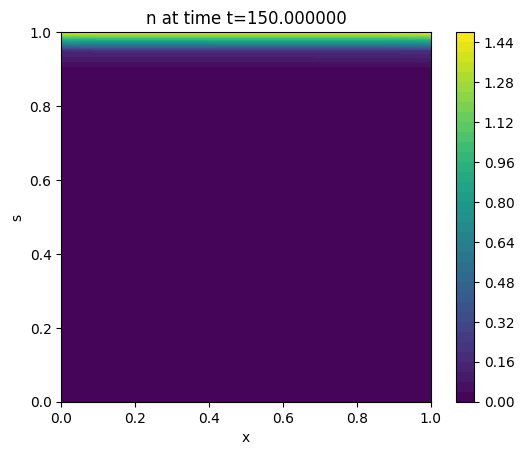

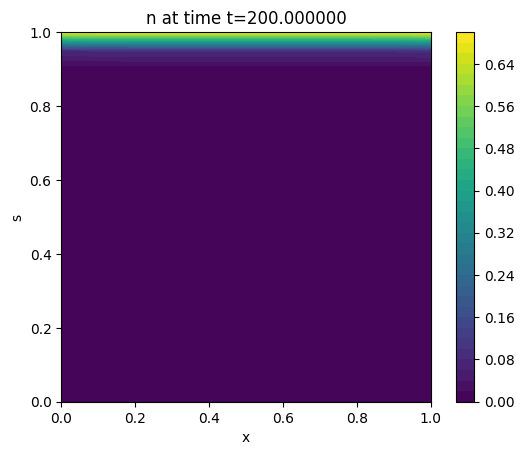

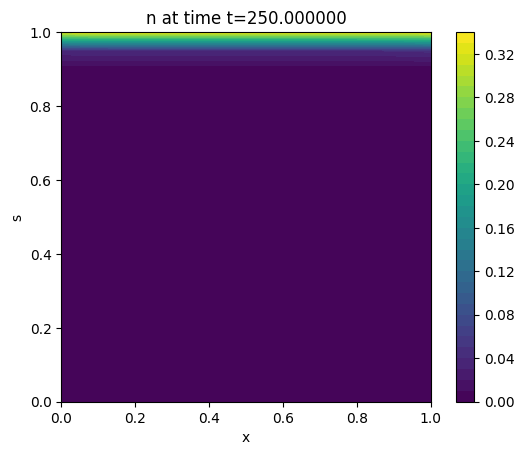

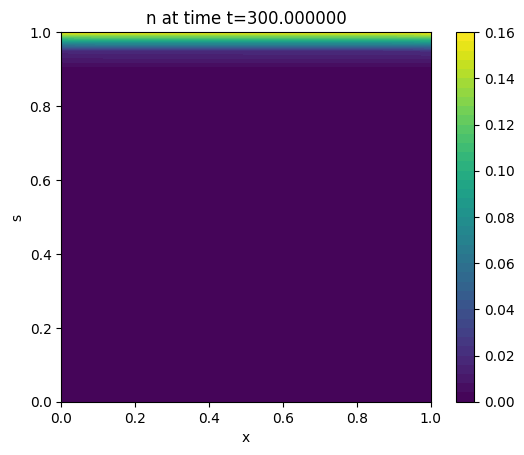

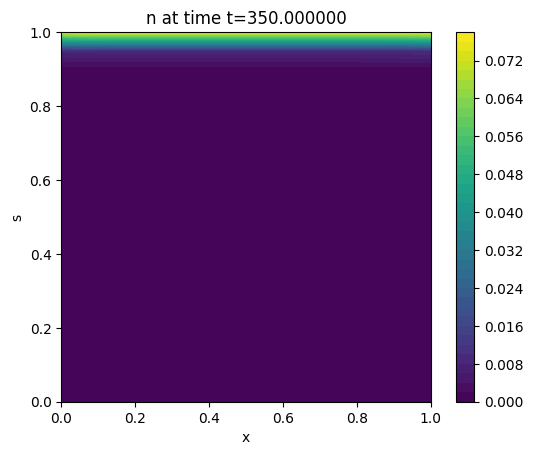

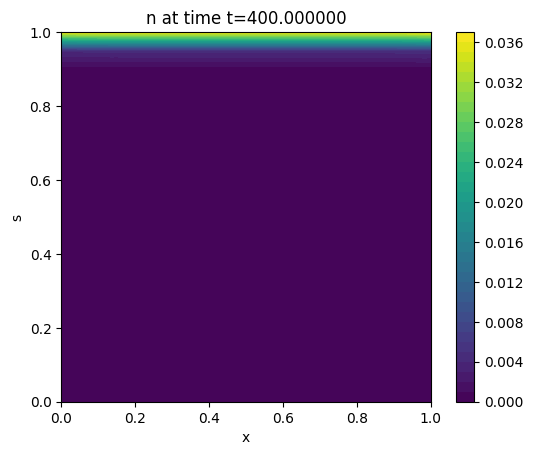

In [21]:
V = FunctionSpace(mesh,"P",2)
N = Function(V)
for i,n in enumerate(n_vect2):
    N.vector().set_local(n)
    sol = plot(N)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

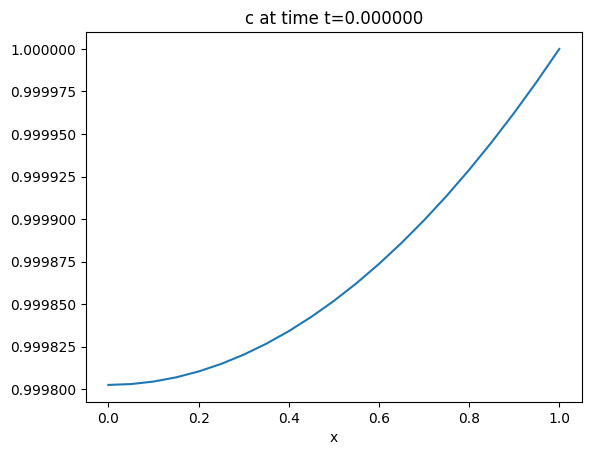

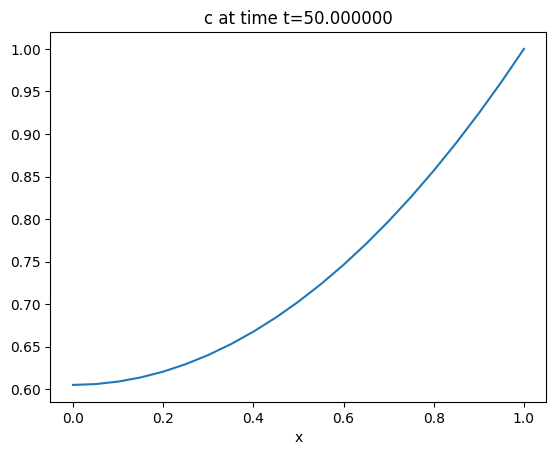

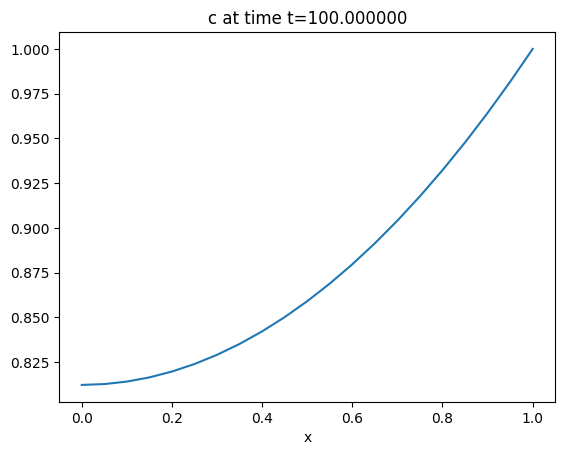

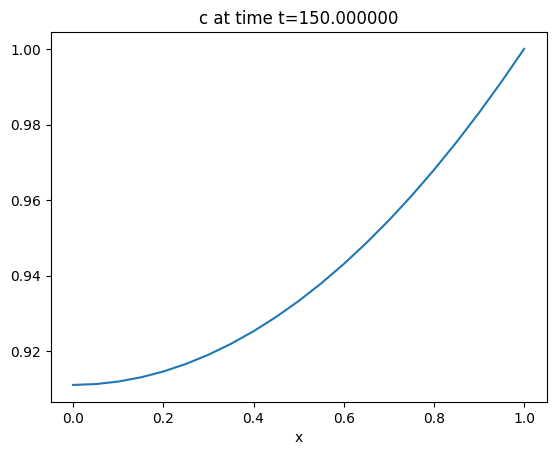

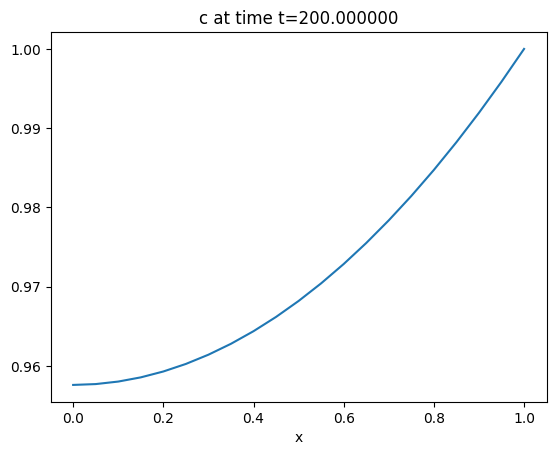

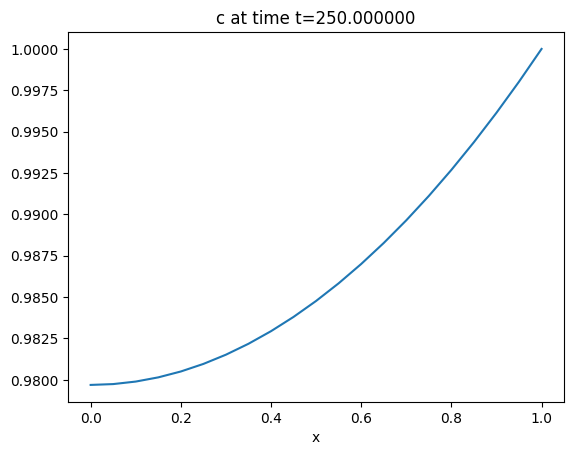

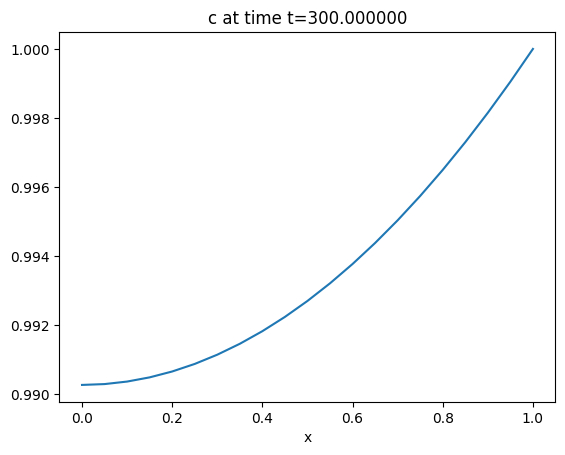

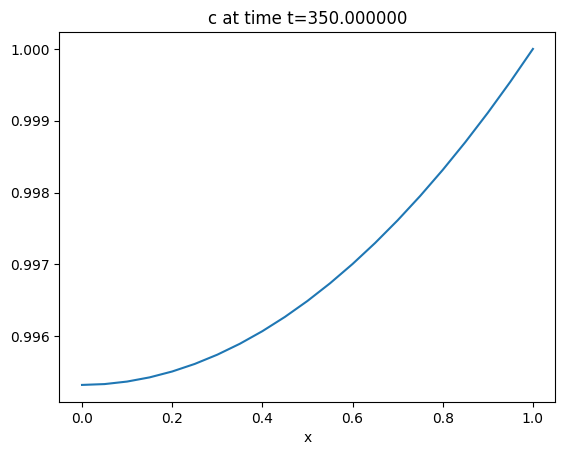

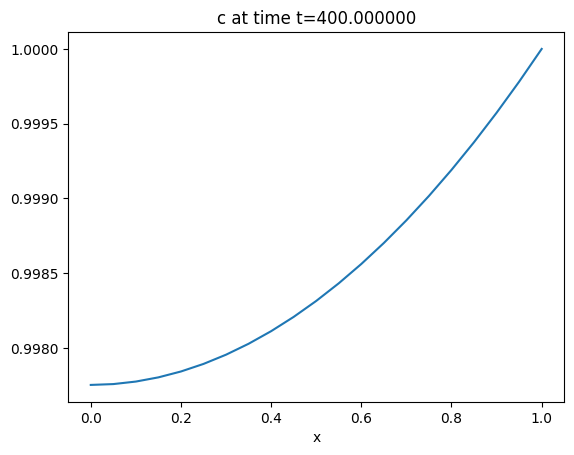

In [55]:
mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
C = Function(V)
for i,c in enumerate(c_vect2):
    C.vector().set_local(c)
    c1D = interpolate(C,V1D)
    sol = plot(c1D)
    plt.title('c at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.show()

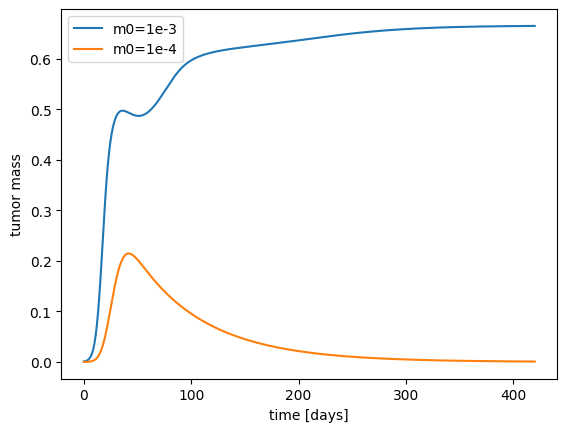

In [58]:
time = np.linspace(0,420,4200)
plt.plot(time,mass)
plt.plot(time,mass2)
plt.legend(['m0=1e-3','m0=1e-4'])
plt.xlabel('time [days]')
plt.ylabel('tumor mass')
plt.show()